<a href="https://colab.research.google.com/github/Manojj1608/main-flow/blob/main/internship_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset

In [ ]:
file_path = "/content/sales_data (1).csv"
try:
    df = pd.read_csv(file_path)
    print("CSV file successfully loaded into a pandas DataFrame.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows

In [15]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Chair,West,250.0,45.0,0.10,Furniture,15-01-2023
1,Table,East,300.0,60.0,0.20,Furniture,16-01-2023
2,Laptop,East,1200.0,200.0,0.00,Technology,17-01-2023
3,Monitor,South,450.0,70.0,0.05,Technology,18-01-2023
4,Printer,North,200.0,30.0,0.15,Technology,19-01-2023


# Basic information about the dataset

In [16]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   11 non-null     object 
 1   Region    11 non-null     object 
 2   Sales     11 non-null     float64
 3   Profit    11 non-null     float64
 4   Discount  11 non-null     float64
 5   Category  12 non-null     object 
 6   Date      12 non-null     object 
dtypes: float64(3), object(4)
memory usage: 804.0+ bytes


# Statistical summary of numerical columns

In [17]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Sales,Profit,Discount
count,11.000000,11.000000,11.000000
mean,600.000000,99.545455,0.090909
std,420.713679,71.744496,0.073547
min,200.000000,30.000000,0.000000
25%,250.000000,45.000000,0.025000
50%,450.000000,60.000000,0.100000
75%,1000.000000,175.000000,0.125000
max,1200.000000,200.000000,0.200000


# Check for duplicates

In [18]:
duplicates=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 4


# Remove duplicates

In [19]:
df = df.drop_duplicates()

# Handle missing values

In [20]:
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

Missing values before cleaning:
Product     1
Region      1
Sales       1
Profit      1
Discount    1
Category    0
Date        0
dtype: int64


# Fill missing numerical values with column mean

In [21]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [22]:
print(f"Missing values after cleaning:\n{df.isnull().sum()}")

Missing values after cleaning:
Product     1
Region      1
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


# Convert 'Date' column to datetime format

In [23]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Verify the changes

In [24]:
print("\nData after cleaning:")
display(df.head())


Data after cleaning:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Chair,West,250.0,45.0,0.10,Furniture,2023-01-15
1,Table,East,300.0,60.0,0.20,Furniture,2023-01-16
2,Laptop,East,1200.0,200.0,0.00,Technology,2023-01-17
3,Monitor,South,450.0,70.0,0.05,Technology,2023-01-18
4,Printer,North,200.0,30.0,0.15,Technology,2023-01-19


# Plot sales trends over time

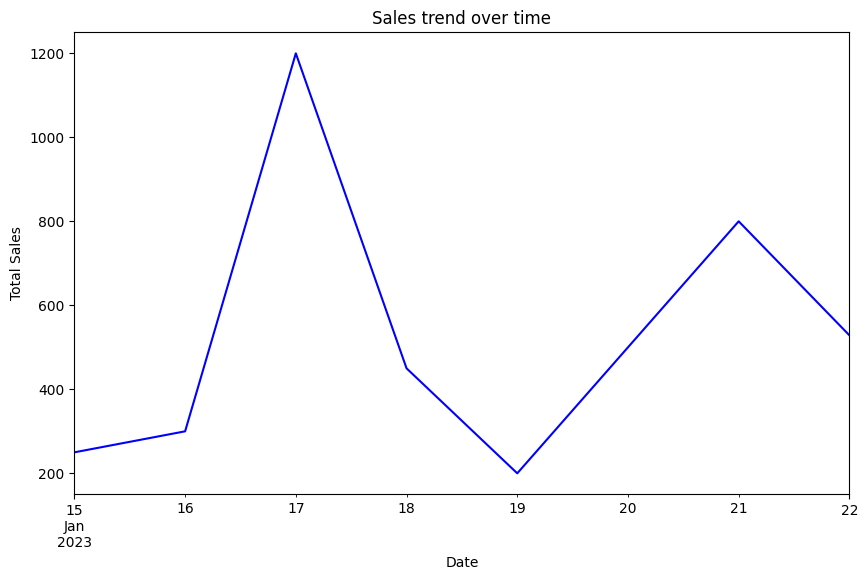

In [25]:
plt.figure(figsize=(10,6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales trend over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot : Profit vs Discount

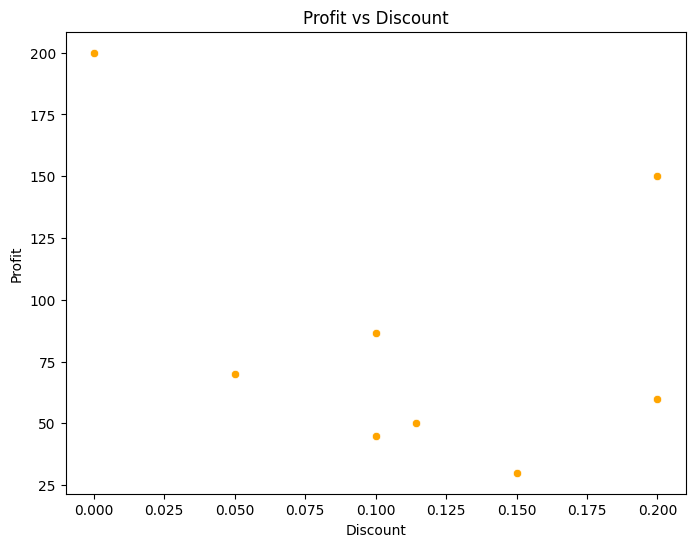

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by region

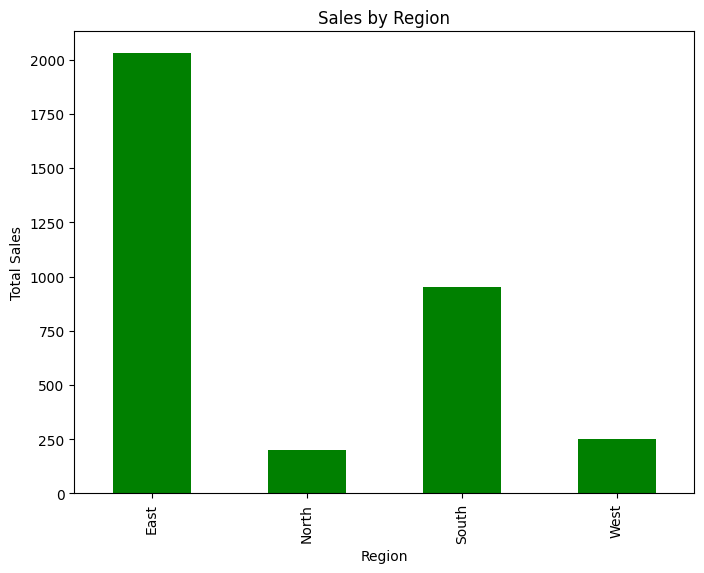

In [27]:
plt.figure(figsize=(8,6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar',color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlations

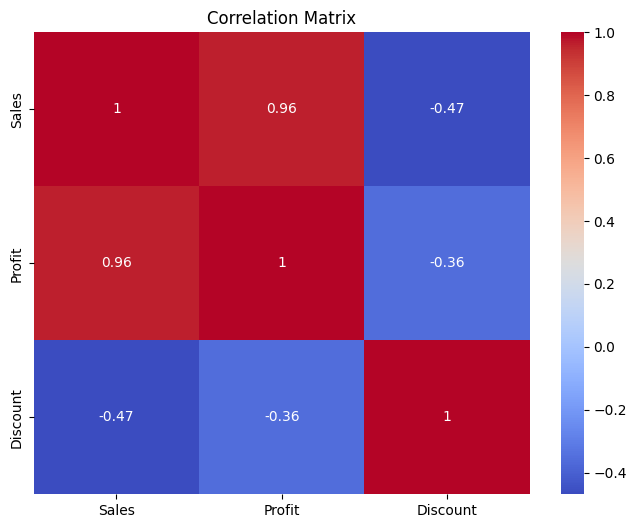

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target

In [30]:
X = df[['Profit','Discount']]
y= df['Sales']

# Select features and target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [33]:
y_pred = model.predict(X_test)

# Evaluate the model

In [34]:
print(f"Mean Squared Error : {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-Squared Score: {r2_score(y_test,y_pred):.2f}")

Mean Squared Error : 2951.82
R-Squared Score: 0.70
